In [59]:
import numpy as np
import cmath
import matplotlib.pyplot as plt

class Ellipsoid (object):
    def __init__ ( self, A,B,C ):
        self.A = A
        self.B = B
        self.C = C
        
    
    def centralSB (self,phi,theta): # calculated the Central SB of our galaxy 
        v = np.array([np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta)])
        full_length = 2/((v[0]**2/self.A**2)+(v[1]**2/self.B**2)+(v[2]**2/self.C**2))
        return full_length 
    
    def effSB (self,phi,theta): # calculates the effective SB of our galaxy
        C1 = (self.A**2 * (np.cos(phi)**2 + np.cos(theta)**2 * np.sin(phi)**2) + 
            self.B**2 * (np.sin(phi)**2 + np.cos(theta)**2 * np.cos(phi)**2)+ 
            self.C**2 * np.sin(theta))
        C0 = (self.A**2 * self.C**2 * np.sin(theta)**2 * np.cos(phi)**2 + 
            self.B**2 * self.C**2 * np.sin(theta)**2 * np.sin(phi)**2 + 
            self.A**2 * self.B**2 * np.cos(theta)**2)
        
        
        d = (C1**2) - (4*C0) 
        b1,b2 = np.sqrt((-C1-np.sqrt(d))/-2) , np.sqrt((-C1+np.sqrt(d))/-2) # only the real positive values matter
        
        
        a_val = np.max([b1,b2],axis=0) 
        b_val = np.min([b1,b2],axis=0)
        
        ba_ratio = b_val/a_val
        
        pro_area = np.pi * a_val * b_val # projected area of the ellipse 
        return ba_ratio,pro_area
    
    
    
    
    
    
    

    
    
class Ellipsoid1 (object):
    def __init__ ( self,B,C ):
        self.B = B
        self.C = C
    
    
    
    
    def effSB2 (self,phi,theta): # this will show the encompass the intrinsic axis ratios B/A and C/A
        C1 = ((np.cos(phi)**2 + np.cos(theta)**2 * np.sin(phi)**2) + 
            self.B**2 * (np.sin(phi)**2 + np.cos(theta)**2 * np.cos(phi)**2)+ 
            self.C**2 * np.sin(theta))
        C0 = (self.C**2 * np.sin(theta)**2 * np.cos(phi)**2 + 
            self.B**2 * self.C**2 * np.sin(theta)**2 * np.sin(phi)**2 + self.B**2 * np.cos(theta)**2)
        
        
        d = (C1**2) - (4*C0)
        print(C1-cmath.sqrt(d))
        b1,b2 = np.sqrt((-C1-np.sqrt(d))/-2) , np.sqrt((-C1+np.sqrt(d))/-2)
        
        a_val = np.max([b1,b2],axis=0)
        b_val = np.min([b1,b2],axis=0)
        pro_area = np.pi * a_val * b_val
        return a_val,b_val,pro_area
    
    def obs_ratio (self,phi,theta):
        C1 = ((np.cos(phi)**2 + np.cos(theta)**2 * np.sin(phi)**2) + 
            self.B**2 * (np.sin(phi)**2 + np.cos(theta)**2 * np.cos(phi)**2)+ 
            self.C**2 * np.sin(theta))
        C0 = (self.C**2 * np.sin(theta)**2 * np.cos(phi)**2 + 
            self.B**2 * self.C**2 * np.sin(theta)**2 * np.sin(phi)**2 + self.B**2 * np.cos(theta)**2)
        
        h = np.sqrt((C1-2*np.sqrt(C0))/(C1+2*np.sqrt(C0)))
        
        ba_ratio = (1-h)/(1+h)
        
        return ba_ratio
        

In [96]:
phi = np.random.uniform(0,2*np.pi,10000)
nu = np.random.uniform(0,1,10000)
theta = np.arccos(2*nu-1)


print(phi)

[3.93205957 4.12616399 2.87400731 ... 4.08315456 0.28897214 3.97718224]


[2. 2. 2. ... 2. 2. 2.]


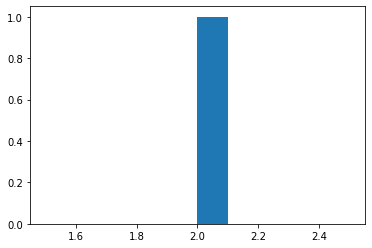

In [98]:
ell = Ellipsoid(1,1,1)
dumm = ell.centralSB(phi,theta)
print(dumm)
plt.hist(dumm[0])
plt.show()

(array([0.96782657, 0.90798435, 0.84518933, ..., 0.82197384, 0.64598085,
       0.72519947]), array([3.14159265, 3.14159265, 3.14159265, ..., 3.14159265, 3.14159265,
       3.14159265]))


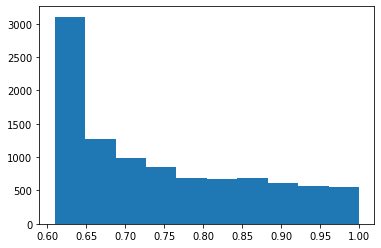

In [97]:
dumm1 = ell.effSB(phi,theta)
print(dumm1)
plt.hist(dumm1[0])
plt.show()

[0.96782657 0.90798435 0.84518933 ... 0.82197384 0.64598085 0.72519947]


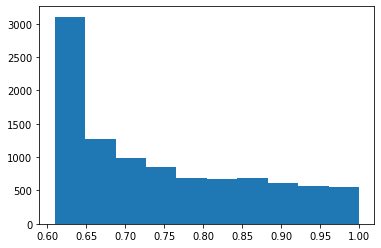

In [99]:
ell1 = Ellipsoid1(1,1)
run = ell1.obs_ratio(phi,theta)
print(run)
plt.hist(run)
plt.show()